In [3]:
#Raj Giri


In [4]:
import numpy as np
import pandas as pd
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import pandas as pd
from keras.callbacks import ModelCheckpoint
import random
import matplotlib.pyplot as plt


Using TensorFlow backend.


### This notebook uses keras and tenserflow library to make linear prediction of  growth rate of companies shares  with neural network from the PC of data which was processed in R before importing to this notebook.

In [5]:
#Shares.csv is the data where we changed the representation of data at the end of section 5 in out project
#The data includes all 737 PC and response variable growth_rate.
df = pd.read_csv("new_data.csv")
df.head()

,Unnamed: 0,tic,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,...,PC729,PC730,PC731,PC732,PC733,PC734,PC735,PC736,PC737,growth_rate
0,1,AIR,3.436783,-0.226331,0.421909,-0.632709,1.554748,-0.564947,2.075328,-4.779531,...,9.315465e-16,2.097931e-16,7.667478e-16,-9.974660e-16,-2.463307e-16,6.765422e-17,6.288373e-16,-2.298509e-17,1.778092e-16,0.050746
1,2,AAL,-12.031750,0.804221,5.917291,-0.801826,6.720588,-3.043645,0.354583,-0.911027,...,-1.196959e-16,-2.086005e-16,3.400058e-16,-1.110223e-16,7.840950e-16,-2.393918e-16,6.297046e-16,-1.886512e-16,-1.279359e-16,-0.382856
2,3,CECE,3.952829,-0.755453,0.075395,-0.382400,1.477339,-1.629387,1.741269,-4.018828,...,-2.012279e-16,3.092145e-16,-1.283695e-16,2.519686e-16,2.775558e-17,1.500536e-16,7.372575e-17,1.140581e-16,1.192622e-16,0.315789
3,4,ASA,3.655771,-0.798300,-0.574748,-0.947220,-1.096444,0.391605,-0.916705,1.840425,...,3.252607e-16,-3.881444e-16,1.838807e-16,1.071192e-16,-3.226586e-16,2.168404e-16,-3.001072e-16,1.309716e-16,-2.051311e-16,-0.216474
4,5,AVX,2.927943,-0.710629,-0.164044,-0.531762,-0.381443,2.078491,-0.219874,0.583290,...,2.636780e-16,6.880347e-16,-2.636780e-16,-7.303186e-16,2.012279e-16,-3.105155e-16,4.449566e-16,-2.090342e-16,2.792905e-16,-0.118497


In [6]:
data = df.iloc[:,1:]
train_data = data.iloc[:,1:-1]
response_data = data.iloc[:,-1]

#Spliting data into training 75% and 25% testing
train_X,test_X,train_Y, test_Y= train_test_split(train_data,response_data, test_size = 0.25, random_state = 100)
train_Y.head()
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(256, kernel_initializer='normal',input_dim = train_X.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

random.seed(123)
NN_model.fit(train_X, train_Y, epochs=500, validation_split = 0.2)




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               188928    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 452,353
Trainable params: 452,353
Non-trainable params: 0
________________________________________________

2582/2582 [==============================] - 2s 918us/step - loss: 0.0968 - mean_absolute_error: 0.0968 - val_loss: 0.2811 - val_mean_absolute_error: 0.2811
Epoch 43/500
2582/2582 [==============================] - 2s 688us/step - loss: 0.0960 - mean_absolute_error: 0.0960 - val_loss: 0.2900 - val_mean_absolute_error: 0.2900
Epoch 44/500
2582/2582 [==============================] - 1s 526us/step - loss: 0.0942 - mean_absolute_error: 0.0942 - val_loss: 0.2825 - val_mean_absolute_error: 0.2825
Epoch 45/500
2582/2582 [==============================] - 2s 727us/step - loss: 0.0934 - mean_absolute_error: 0.0934 - val_loss: 0.2810 - val_mean_absolute_error: 0.2810
Epoch 46/500
2582/2582 [==============================] - 1s 519us/step - loss: 0.0883 - mean_absolute_error: 0.0883 - val_loss: 0.2872 - val_mean_absolute_error: 0.2872
Epoch 47/500
2582/2582 [==============================] - 1s 556us/step - loss: 0.0894 - mean_absolute_error: 0.0894 - val_loss: 0.2832 - val_mean_absolute_error: 

2582/2582 [==============================] - 1s 538us/step - loss: 0.0509 - mean_absolute_error: 0.0509 - val_loss: 0.2902 - val_mean_absolute_error: 0.2902
Epoch 91/500
2582/2582 [==============================] - 2s 863us/step - loss: 0.0515 - mean_absolute_error: 0.0515 - val_loss: 0.2897 - val_mean_absolute_error: 0.2897
Epoch 92/500
2582/2582 [==============================] - 1s 497us/step - loss: 0.0520 - mean_absolute_error: 0.0520 - val_loss: 0.2877 - val_mean_absolute_error: 0.2877
Epoch 93/500
2582/2582 [==============================] - 1s 572us/step - loss: 0.0499 - mean_absolute_error: 0.0499 - val_loss: 0.2979 - val_mean_absolute_error: 0.2979
Epoch 94/500
2582/2582 [==============================] - 2s 650us/step - loss: 0.0518 - mean_absolute_error: 0.0518 - val_loss: 0.2880 - val_mean_absolute_error: 0.2880
Epoch 95/500
2582/2582 [==============================] - 2s 671us/step - loss: 0.0510 - mean_absolute_error: 0.0510 - val_loss: 0.2927 - val_mean_absolute_error: 

2582/2582 [==============================] - 1s 456us/step - loss: 0.0353 - mean_absolute_error: 0.0353 - val_loss: 0.2923 - val_mean_absolute_error: 0.2923
Epoch 139/500
2582/2582 [==============================] - 1s 514us/step - loss: 0.0371 - mean_absolute_error: 0.0371 - val_loss: 0.2924 - val_mean_absolute_error: 0.2924
Epoch 140/500
2582/2582 [==============================] - 1s 420us/step - loss: 0.0357 - mean_absolute_error: 0.0357 - val_loss: 0.2939 - val_mean_absolute_error: 0.2939
Epoch 141/500
2582/2582 [==============================] - 1s 384us/step - loss: 0.0346 - mean_absolute_error: 0.0346 - val_loss: 0.2872 - val_mean_absolute_error: 0.2872
Epoch 142/500
2582/2582 [==============================] - 2s 723us/step - loss: 0.0368 - mean_absolute_error: 0.0368 - val_loss: 0.2962 - val_mean_absolute_error: 0.2962
Epoch 143/500
2582/2582 [==============================] - 2s 612us/step - loss: 0.0378 - mean_absolute_error: 0.0378 - val_loss: 0.2953 - val_mean_absolute_er

Epoch 186/500
2582/2582 [==============================] - 1s 476us/step - loss: 0.0303 - mean_absolute_error: 0.0303 - val_loss: 0.2966 - val_mean_absolute_error: 0.2966
Epoch 187/500
2582/2582 [==============================] - 1s 462us/step - loss: 0.0332 - mean_absolute_error: 0.0332 - val_loss: 0.2939 - val_mean_absolute_error: 0.2939
Epoch 188/500
2582/2582 [==============================] - 2s 812us/step - loss: 0.0287 - mean_absolute_error: 0.0287 - val_loss: 0.3039 - val_mean_absolute_error: 0.3039
Epoch 189/500
2582/2582 [==============================] - 1s 467us/step - loss: 0.0294 - mean_absolute_error: 0.0294 - val_loss: 0.2882 - val_mean_absolute_error: 0.2882
Epoch 190/500
2582/2582 [==============================] - 1s 483us/step - loss: 0.0298 - mean_absolute_error: 0.0298 - val_loss: 0.2926 - val_mean_absolute_error: 0.2926
Epoch 191/500
2582/2582 [==============================] - 1s 440us/step - loss: 0.0310 - mean_absolute_error: 0.0310 - val_loss: 0.2830 - val_me

Epoch 234/500
2582/2582 [==============================] - 1s 392us/step - loss: 0.0267 - mean_absolute_error: 0.0267 - val_loss: 0.2917 - val_mean_absolute_error: 0.2917
Epoch 235/500
2582/2582 [==============================] - 1s 512us/step - loss: 0.0257 - mean_absolute_error: 0.0257 - val_loss: 0.2965 - val_mean_absolute_error: 0.2965
Epoch 236/500
2582/2582 [==============================] - 2s 713us/step - loss: 0.0267 - mean_absolute_error: 0.0267 - val_loss: 0.2883 - val_mean_absolute_error: 0.2883
Epoch 237/500
2582/2582 [==============================] - 2s 683us/step - loss: 0.0282 - mean_absolute_error: 0.0282 - val_loss: 0.2985 - val_mean_absolute_error: 0.2985
Epoch 238/500
2582/2582 [==============================] - 2s 633us/step - loss: 0.0288 - mean_absolute_error: 0.0288 - val_loss: 0.2899 - val_mean_absolute_error: 0.2899
Epoch 239/500
2582/2582 [==============================] - 1s 457us/step - loss: 0.0273 - mean_absolute_error: 0.0273 - val_loss: 0.2903 - val_me

Epoch 282/500
2582/2582 [==============================] - 2s 741us/step - loss: 0.0218 - mean_absolute_error: 0.0218 - val_loss: 0.2935 - val_mean_absolute_error: 0.2935
Epoch 283/500
2582/2582 [==============================] - 2s 759us/step - loss: 0.0229 - mean_absolute_error: 0.0229 - val_loss: 0.2916 - val_mean_absolute_error: 0.2916
Epoch 284/500
2582/2582 [==============================] - 2s 764us/step - loss: 0.0222 - mean_absolute_error: 0.0222 - val_loss: 0.2945 - val_mean_absolute_error: 0.2945
Epoch 285/500
2582/2582 [==============================] - 2s 732us/step - loss: 0.0218 - mean_absolute_error: 0.0218 - val_loss: 0.2924 - val_mean_absolute_error: 0.2924
Epoch 286/500
2582/2582 [==============================] - 1s 493us/step - loss: 0.0221 - mean_absolute_error: 0.0221 - val_loss: 0.2960 - val_mean_absolute_error: 0.2960
Epoch 287/500
2582/2582 [==============================] - 1s 504us/step - loss: 0.0221 - mean_absolute_error: 0.0221 - val_loss: 0.2896 - val_me

2582/2582 [==============================] - 3s 997us/step - loss: 0.0233 - mean_absolute_error: 0.0233 - val_loss: 0.2906 - val_mean_absolute_error: 0.2906
Epoch 331/500
2582/2582 [==============================] - 5s 2ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - val_loss: 0.2928 - val_mean_absolute_error: 0.2928
Epoch 332/500
2582/2582 [==============================] - 2s 844us/step - loss: 0.0217 - mean_absolute_error: 0.0217 - val_loss: 0.2932 - val_mean_absolute_error: 0.2932
Epoch 333/500
2582/2582 [==============================] - 2s 732us/step - loss: 0.0228 - mean_absolute_error: 0.0228 - val_loss: 0.2887 - val_mean_absolute_error: 0.2887
Epoch 334/500
2582/2582 [==============================] - 2s 945us/step - loss: 0.0216 - mean_absolute_error: 0.0216 - val_loss: 0.2884 - val_mean_absolute_error: 0.2884
Epoch 335/500
2582/2582 [==============================] - 3s 1ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - val_loss: 0.2981 - val_mean_absolute_error:

2582/2582 [==============================] - 2s 731us/step - loss: 0.0188 - mean_absolute_error: 0.0188 - val_loss: 0.2998 - val_mean_absolute_error: 0.2998
Epoch 379/500
2582/2582 [==============================] - 2s 777us/step - loss: 0.0200 - mean_absolute_error: 0.0200 - val_loss: 0.3005 - val_mean_absolute_error: 0.3005
Epoch 380/500
2582/2582 [==============================] - 2s 757us/step - loss: 0.0198 - mean_absolute_error: 0.0198 - val_loss: 0.2935 - val_mean_absolute_error: 0.2935
Epoch 381/500
2582/2582 [==============================] - 2s 910us/step - loss: 0.0199 - mean_absolute_error: 0.0199 - val_loss: 0.2987 - val_mean_absolute_error: 0.2987
Epoch 382/500
2582/2582 [==============================] - 1s 487us/step - loss: 0.0194 - mean_absolute_error: 0.0194 - val_loss: 0.2989 - val_mean_absolute_error: 0.2989
Epoch 383/500
2582/2582 [==============================] - 1s 529us/step - loss: 0.0180 - mean_absolute_error: 0.0180 - val_loss: 0.2972 - val_mean_absolute_er

Epoch 426/500
2582/2582 [==============================] - 2s 793us/step - loss: 0.0227 - mean_absolute_error: 0.0227 - val_loss: 0.3048 - val_mean_absolute_error: 0.3048
Epoch 427/500
2582/2582 [==============================] - 2s 727us/step - loss: 0.0206 - mean_absolute_error: 0.0206 - val_loss: 0.3006 - val_mean_absolute_error: 0.3006
Epoch 428/500
2582/2582 [==============================] - 1s 481us/step - loss: 0.0191 - mean_absolute_error: 0.0191 - val_loss: 0.3006 - val_mean_absolute_error: 0.3006
Epoch 429/500
2582/2582 [==============================] - 2s 816us/step - loss: 0.0208 - mean_absolute_error: 0.0208 - val_loss: 0.3060 - val_mean_absolute_error: 0.3060
Epoch 430/500
2582/2582 [==============================] - 2s 835us/step - loss: 0.0225 - mean_absolute_error: 0.0225 - val_loss: 0.3074 - val_mean_absolute_error: 0.3074
Epoch 431/500
2582/2582 [==============================] - 2s 711us/step - loss: 0.0199 - mean_absolute_error: 0.0199 - val_loss: 0.3018 - val_me

2582/2582 [==============================] - 1s 485us/step - loss: 0.0156 - mean_absolute_error: 0.0156 - val_loss: 0.3086 - val_mean_absolute_error: 0.3086
Epoch 475/500
2582/2582 [==============================] - 2s 878us/step - loss: 0.0157 - mean_absolute_error: 0.0157 - val_loss: 0.3030 - val_mean_absolute_error: 0.3030
Epoch 476/500
2582/2582 [==============================] - 2s 704us/step - loss: 0.0171 - mean_absolute_error: 0.0171 - val_loss: 0.3038 - val_mean_absolute_error: 0.3038
Epoch 477/500
2582/2582 [==============================] - 2s 735us/step - loss: 0.0169 - mean_absolute_error: 0.0169 - val_loss: 0.3080 - val_mean_absolute_error: 0.3080
Epoch 478/500
2582/2582 [==============================] - 2s 609us/step - loss: 0.0168 - mean_absolute_error: 0.0168 - val_loss: 0.3063 - val_mean_absolute_error: 0.3063
Epoch 479/500
2582/2582 [==============================] - 2s 717us/step - loss: 0.0175 - mean_absolute_error: 0.0175 - val_loss: 0.3037 - val_mean_absolute_er

In [25]:
# data.to_csv ('insample_prediction.csv', index = False, header=True)

In [9]:
#Prediction on training data
predictions_train = NN_model.predict(train_X)
MAE_train = np.mean(abs(predictions_train.flatten() - train_Y))
recommended_portfolio_train = np.sort(predictions_train.flatten(),axis = None)[-12:]
profit_training = sum((1+recommended_portfolio_train) * (1000000/12)) - 1000000
profit_rate_training = profit_training / 1000000
train_summary = pd.DataFrame({"MAE_train" : [MAE_train],
              "profit_train" : [np.round(profit_training,3)],
             "profit_rate_train" : [profit_rate_training]})
train_summary

,MAE_train,profit_train,profit_rate_train
0,0.072395,2861450.766,2.861451


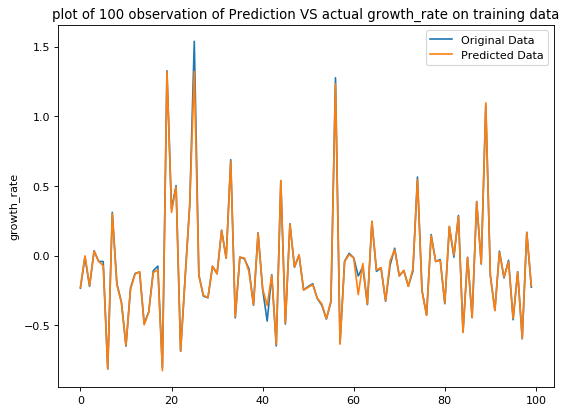

In [10]:
fig=plt.figure(figsize=(8, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(range(100),train_Y[200:300],label="Original Data")
plt.plot(range((100)),predictions_train[200:300],label="Predicted Data")
plt.ylabel('growth_rate')
plt.xlabel('')
plt.legend(loc='best')
plt.title('plot of 100 observation of Prediction VS actual growth_rate on training data')
plt.show()

In [12]:
#Prediction on test data
prediction_test = NN_model.predict(test_X)
MAE_test = np.mean(abs(prediction_test.flatten() - test_Y))
recommended_portfolio_test = np.sort(prediction_test.flatten(),axis = None)[-12:]
profit = sum((1+recommended_portfolio_test) * (1000000/12)) - 1000000
profit_rate = profit / 1000000
test_summary = pd.DataFrame({"MAE_test" : [MAE_test],
              "profit_test" : [np.round(profit,2)],
             "profit_rate_test" : [profit_rate]})
test_summary


,MAE_test,profit_test,profit_rate_test
0,0.285511,946947.78,0.946948


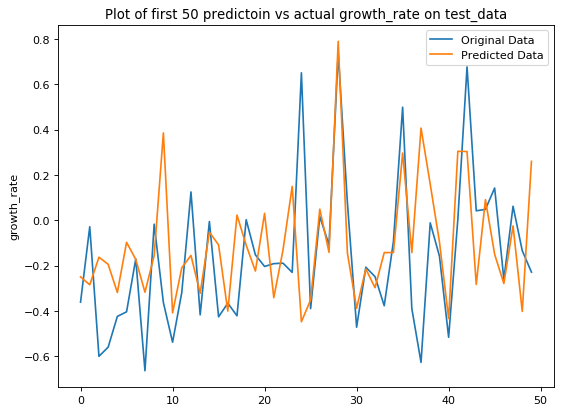

In [13]:
fig=plt.figure(figsize=(8, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(range(50),test_Y[150:200],label="Original Data")
plt.plot(range((50)),prediction_test[150:200],label="Predicted Data")
plt.ylabel('growth_rate')
plt.xlabel('')
plt.title('Plot of first 50 predictoin vs actual growth_rate on test_data')
plt.legend(loc='best')
plt.show()

In [20]:
#Rec.csv is the data that professor gave at end of notebook to predict portfolio recommendation from 2018 company fundamentals
data_fund_2018 = pd.read_csv('neural_recommend.csv')
format_test = data_fund_2018.iloc[:,2:]
format_test.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC728,PC729,PC730,PC731,PC732,PC733,PC734,PC735,PC736,PC737
0,3.472287,-0.084258,0.373416,-0.708036,1.514166,-0.579639,2.026183,-4.621171,2.404449,0.922941,...,-6.223320e-16,-5.877460e-16,3.378374e-16,1.682682e-16,7.780235e-16,-5.057278e-16,-7.548216e-16,-7.459311e-16,4.926615e-16,-4.570996e-16
1,2.796849,-0.100005,0.365191,-0.389115,0.853414,-1.655226,1.067232,-2.387928,-0.077713,0.003418,...,1.743397e-16,2.560886e-16,-7.845287e-16,-5.637851e-17,2.160598e-15,-1.149037e-15,2.870967e-16,-3.139849e-16,2.567391e-16,-2.923009e-16
2,3.986999,-0.653669,-0.566531,-0.989951,-1.626589,2.107879,-0.752512,2.015109,2.756417,1.335420,...,-1.708703e-16,-4.216462e-16,6.722053e-17,6.331741e-17,8.864437e-16,-8.951173e-16,2.666053e-16,-5.603157e-16,2.246467e-16,-2.116363e-16
3,3.642196,-0.563078,0.521477,-0.587180,1.099129,-0.658786,2.134298,-4.816553,2.523821,0.889389,...,-5.499073e-16,-5.526178e-16,2.445960e-16,1.231654e-16,7.645794e-16,-1.064253e-15,3.224146e-16,-3.590878e-16,3.001072e-16,-5.694230e-16
4,-4.313079,0.963511,1.430965,-1.838512,-1.345958,2.144800,-0.330502,1.910505,-3.383656,0.025646,...,1.283695e-16,-4.681585e-16,-4.636048e-16,1.561251e-17,1.992764e-15,-8.187895e-16,5.255535e-16,-4.180684e-16,3.716645e-16,-3.690624e-16


In [24]:
new_pred = NN_model.predict(format_test)
new_pred[:10]

array([[-0.2662064 ],
       [-0.17183164],
       [ 0.02669802],
       [-0.20700148],
       [ 0.16105504],
       [-0.21152326],
       [ 0.11338612],
       [-0.30673182],
       [ 0.39026925],
       [-0.25800326]], dtype=float32)

In [25]:
data_fund_2018["Prediction"] = new_pred
data_fund_2018.iloc[:,[0,1,-1]]

,tic,conm,Prediction
0,AIR,AAR CORP,-0.266206
1,ABM,ABM INDUSTRIES INC,-0.171832
2,AMSWA,AMERICAN SOFTWARE -CL A,0.026698
3,AXR,AMREP CORP,-0.207001
4,ADI,ANALOG DEVICES,0.161055
...,...,...,...
225,VRA,VERA BRADLEY INC,0.066713
226,TLYS,TILLY'S INC,0.298200
227,FRG,FRANCHISE GROUP INC,-0.081123
228,GWRE,GUIDEWIRE SOFTWARE INC,0.242677


In [27]:
recommendation = data_fund_2018.sort_values(by=['Prediction'],ascending=False).head(12)
recommendation = recommendation.iloc[:,[0,1,-1]]
recommendation

,tic,conm,Prediction
159,ZUO,ZUORA INC,0.656234
150,OKTA,OKTA INC,0.564352
147,AEO,AMERN EAGLE OUTFITTERS INC,0.535910
162,PVTL,PIVOTAL SOFTWARE INC,0.489136
216,IAE,VOYA ASIA PAC HI DIV EQ INCM,0.481347
220,ULTA,ULTA BEAUTY INC,0.459900
156,MDB,MONGODB INC,0.440235
224,EXPR,EXPRESS INC,0.434321
151,CLDR,CLOUDERA INC,0.424644
99,AMBA,AMBARELLA INC,0.418831
